# Kernel Types

Let's try different kernel types.

## Response Pattern

Show how each kernel varies with pairwise-point-distances.

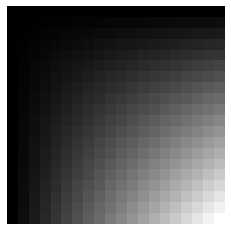

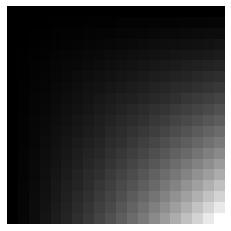

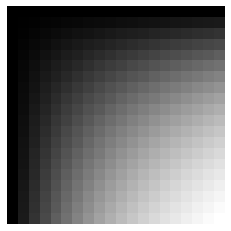

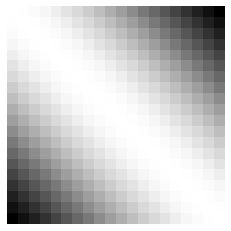

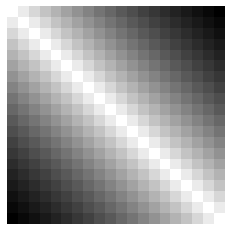

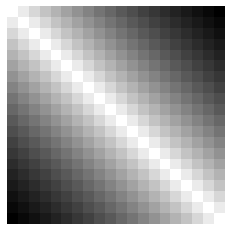

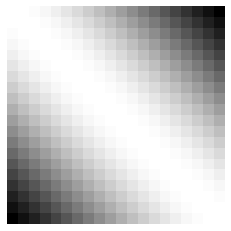

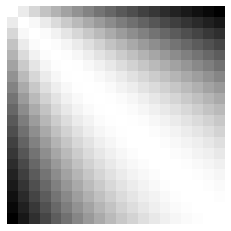

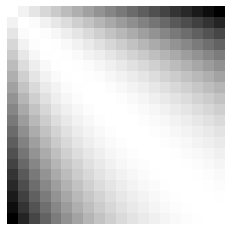

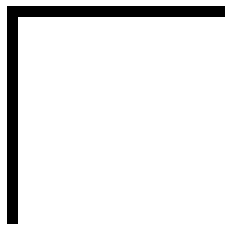

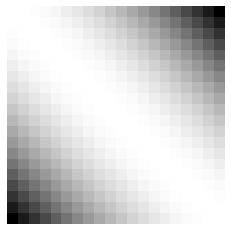

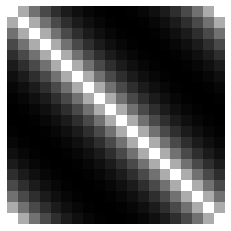

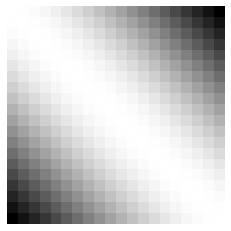

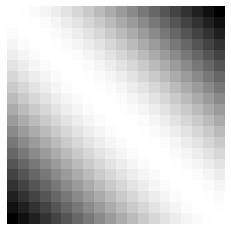

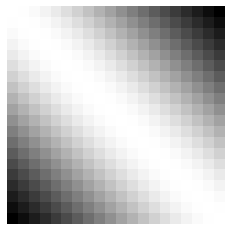

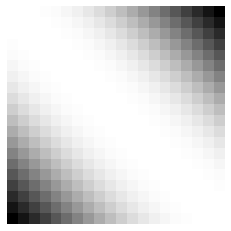

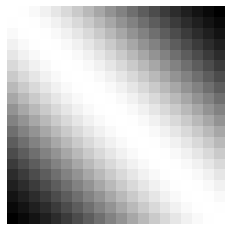

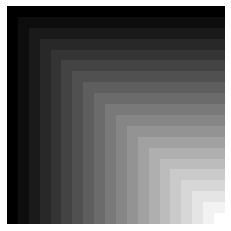

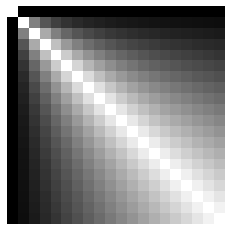

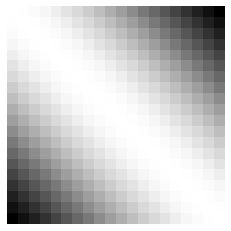

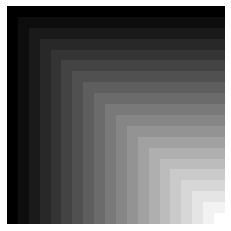

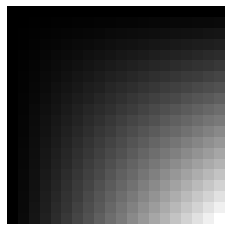

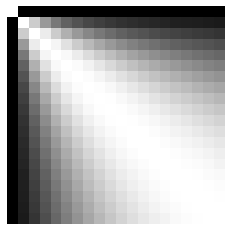

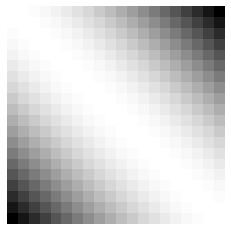

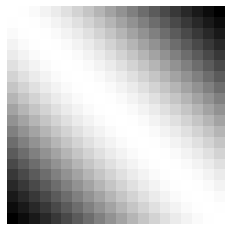

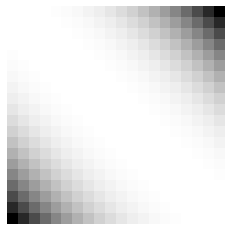

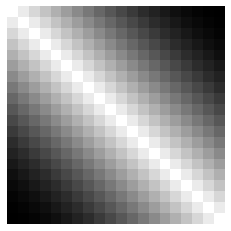

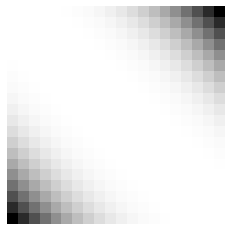

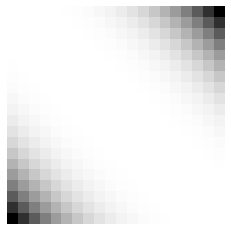

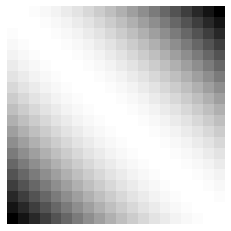

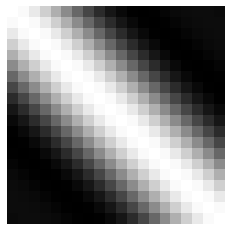

In [4]:
%run ./src/ackl/metrics.py
linear_response_pattern(20)

## Binary Response Pattern

       0      1 
    0  k(0,0) k(0,1)
    1  k(1,0) k(1,1)

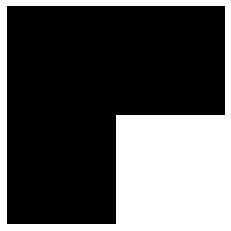

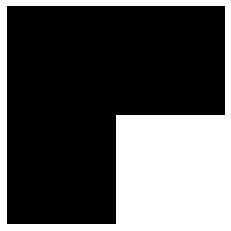

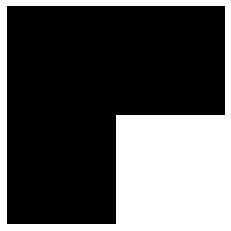

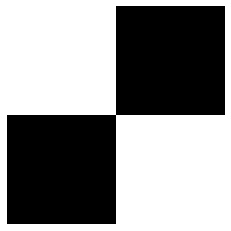

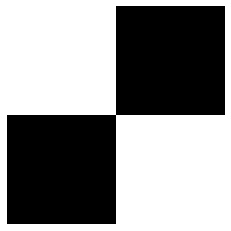

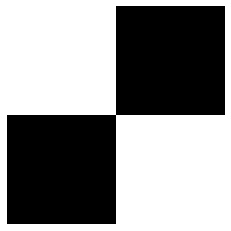

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:133: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt (math.pi / (2*x)) * np.exp(-x)
C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:130: RuntimeWarning: invalid value encountered in multiply
  return 1/(math.gamma(v) * 2**(v-1) ) * (z**v) * mod_bessel(z)


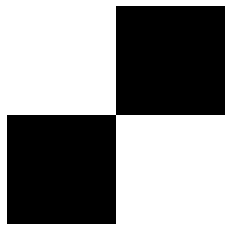

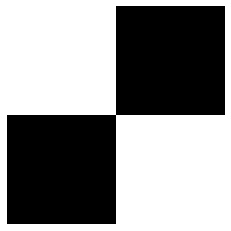

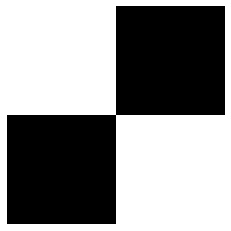

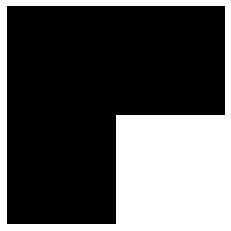

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:210: RuntimeWarning: divide by zero encountered in double_scalars
  M[idx1,idx2] = s/d * math.sin(d/s)
C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:210: RuntimeWarning: invalid value encountered in double_scalars
  M[idx1,idx2] = s/d * math.sin(d/s)


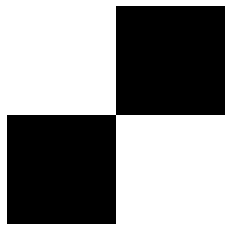

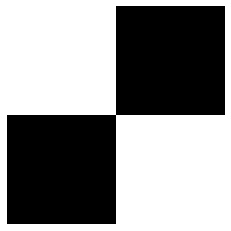

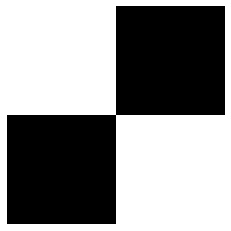

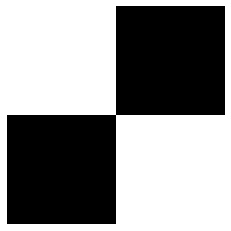

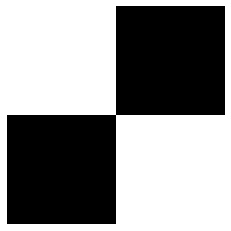

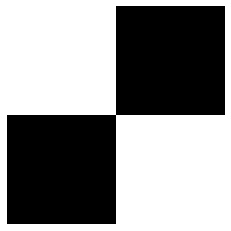

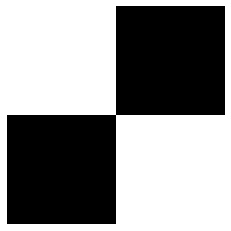

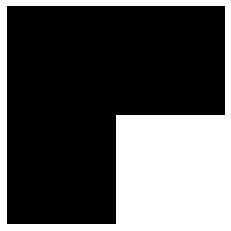

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:953: RuntimeWarning: invalid value encountered in true_divide
  return minkernel/maxkernel


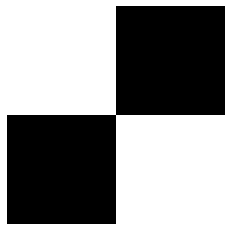

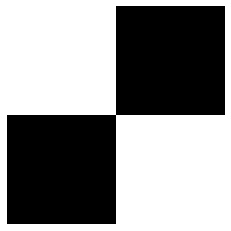

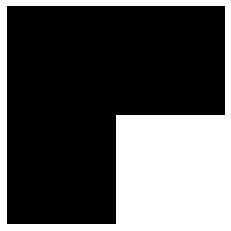

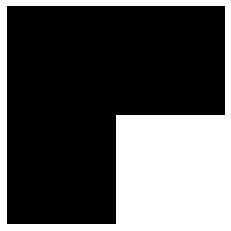

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:801: RuntimeWarning: invalid value encountered in true_divide
  return 2 * prod / (norm_1 + norm_2.T)


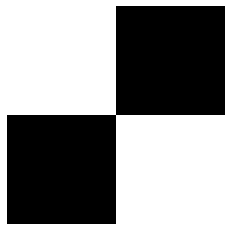

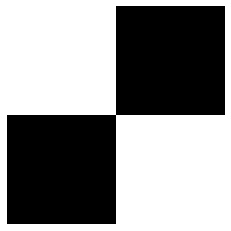

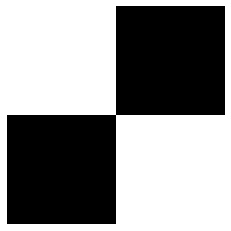

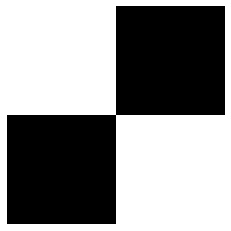

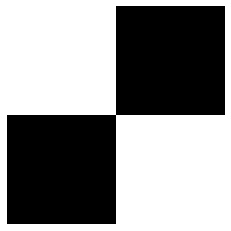

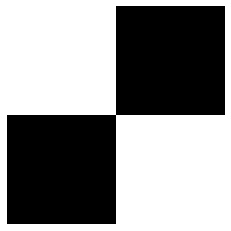

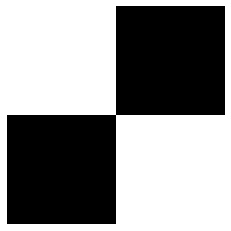

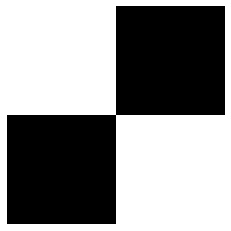

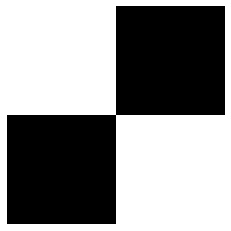

In [2]:
binary_response_pattern()

# Real Dataset Experiments

load dataset from 754b_C2S_Shihu.txt
X.shape (232, 877)  y.shape (232,)


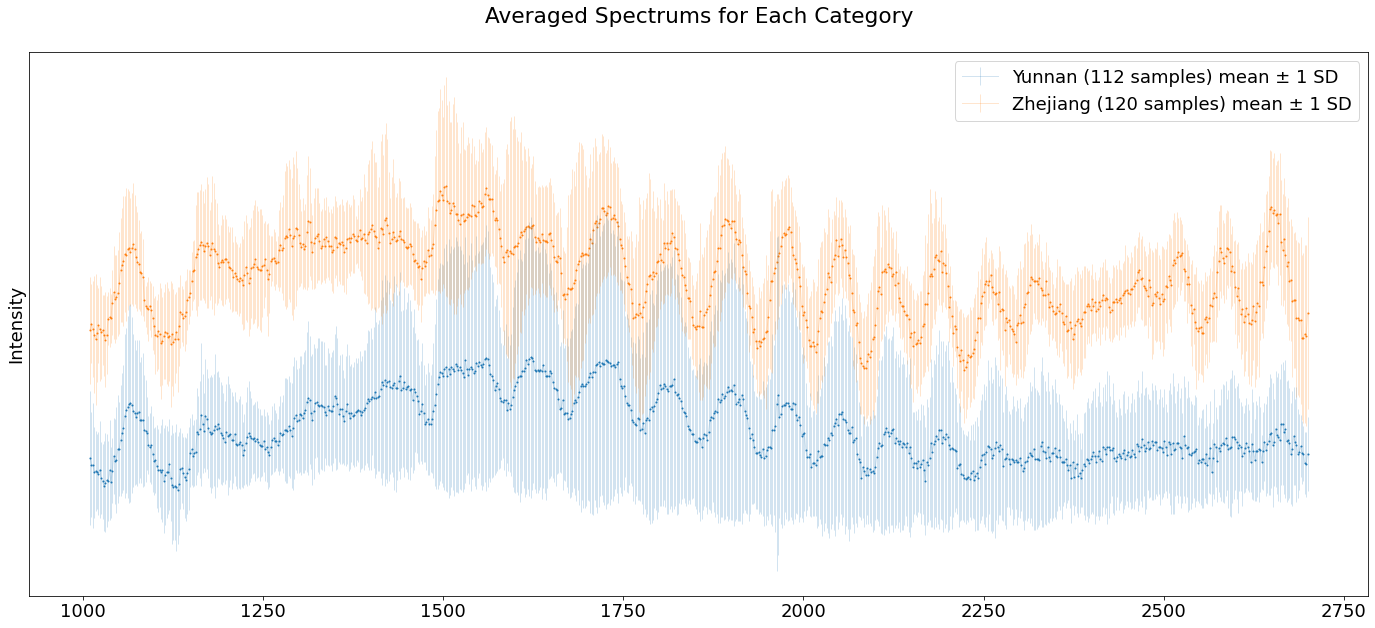

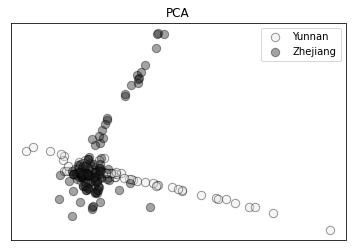

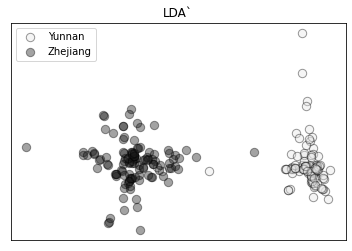

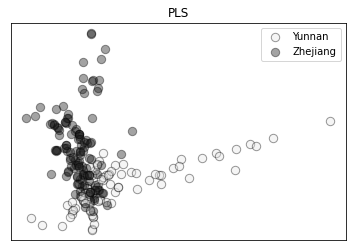

Data Set ID: 754b 铁皮石斛拉曼光谱

[云南，浙江温州]

C1 - Yunan Province (112 samples)
C2 - Wenzhou, Zhejiang Province (120 samples)

铁皮石斛拉曼光谱采集
（1）采集磐安、乐青、云南等多个产地的铁皮石斛干品样本，每个产地收集m份，样品经中药高速粉碎机成粉末样品，过200目筛后放入自封袋保存备用。
（2）实验采用美国Thermofisher公司生产的DXR2xi型显微拉曼光谱仪，拉曼光谱系统的激发波长为785nm，测量范围为50～3400 cm-1，激光功率30 mW，曝光时间0.5 s，扫描次数1000次。待测样品粉末平铺于载玻片上制成厚度均匀的片状样品后置于载物台上进行拉曼光谱采集。


In [3]:
from qsi import io
X, y, X_names, desc, labels = io.load_dataset('shihu_c2', shift = 500)

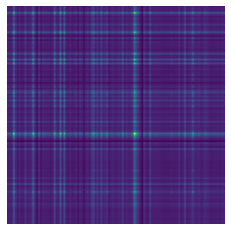

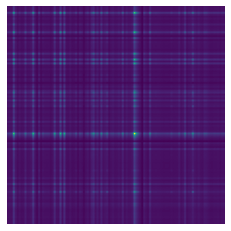

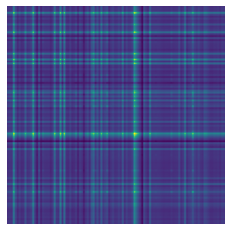

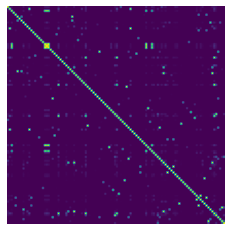

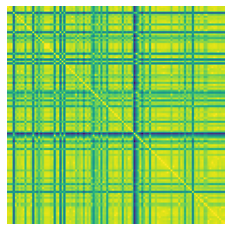

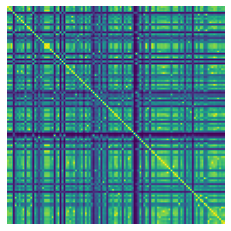

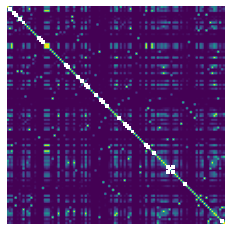

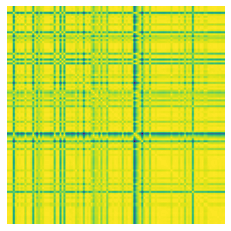

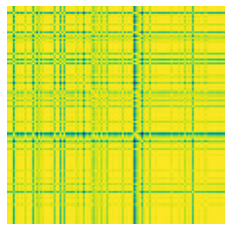

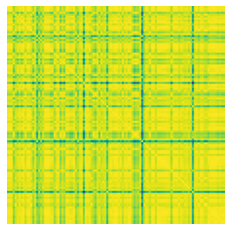

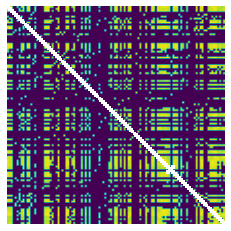

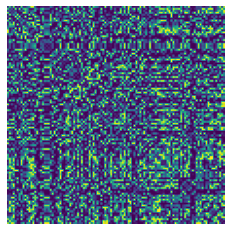

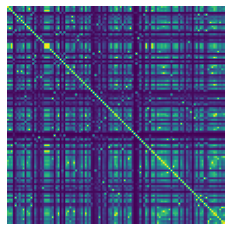

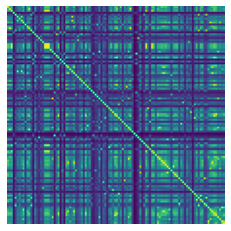

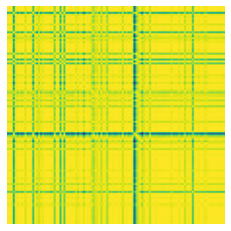

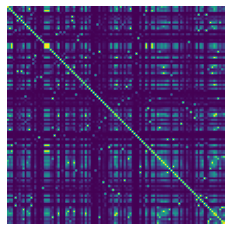

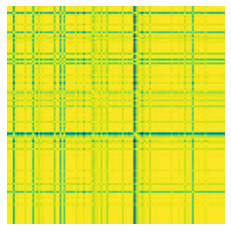

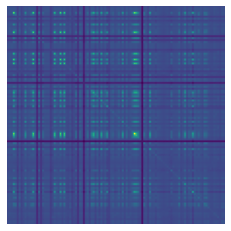

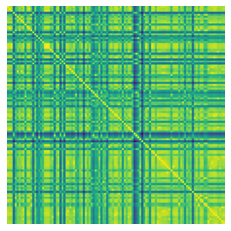

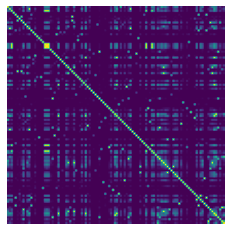

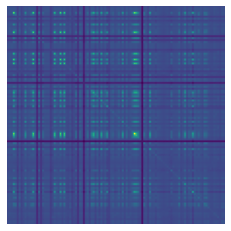

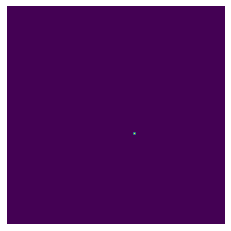

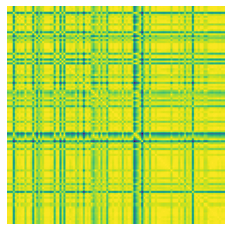

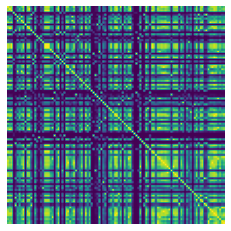

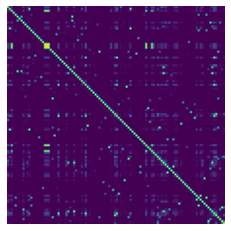

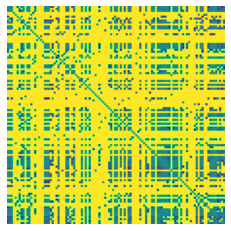

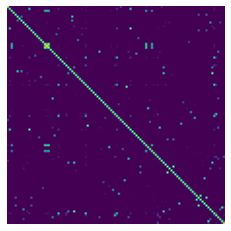

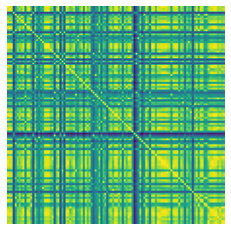

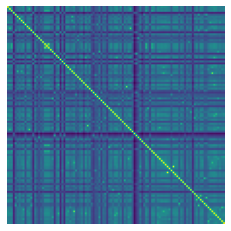

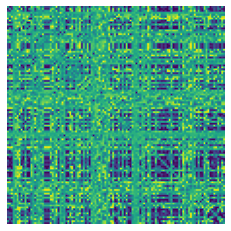

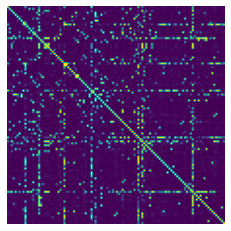

In [4]:
preview_kernels_on_dataset(X,y,embed_title = False)

load dataset from 7b43.csv
X.shape (119, 45345)  y.shape (119,)


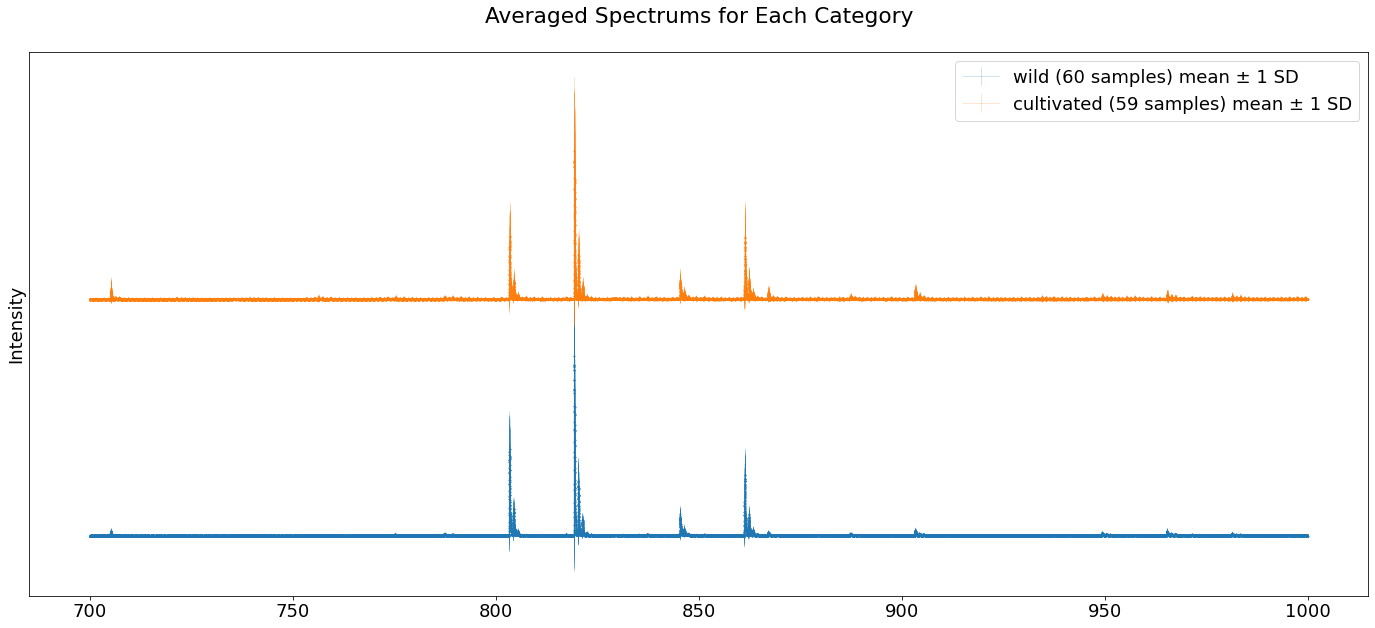

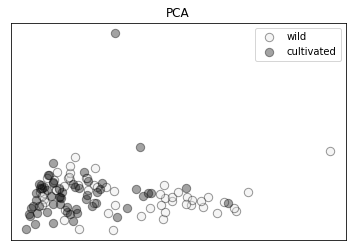

内蒙古野生与种植柴胡质谱
Dataset Id: 7b43
The 21th sample of class 1 is an outlier and we removed it.

['0 野生品种','1 种植品种']


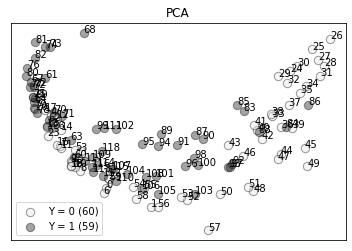

处理后数据维度：X.shape =  (119, 4534)


In [1]:
from qsi import io
X, y, X_names, desc, labels = io.load_dataset('chaihu_ms', shift = 500)

NX = io.pre.rowvec_normalize(X)
io.scatter_plot(NX, y, tags = list(range(len(NX))))

X, X_names = io.pre.x_binning(NX,X_names,target_dim=0.1,flavor='max') # flavor = 'sum'
print('处理后数据维度：X.shape = ', X.shape)

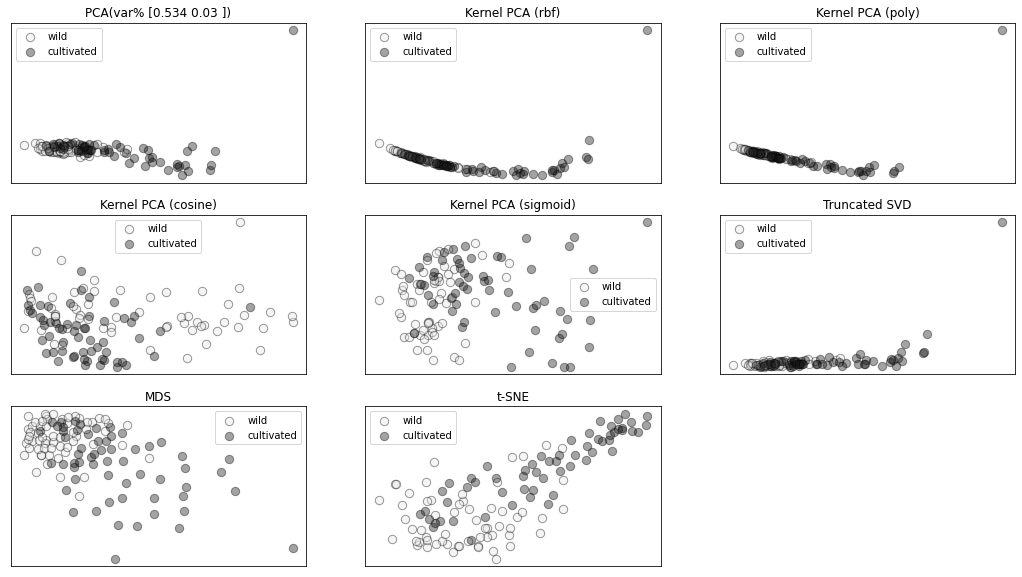

In [2]:
# normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# scaling to [0,1]
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_mm_scaled = mm_scaler.fit_transform(X)

from qsi import vis
vis.unsupervised_dimension_reductions(X_mm_scaled, y, legends = labels)

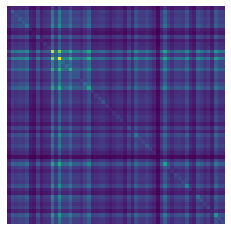

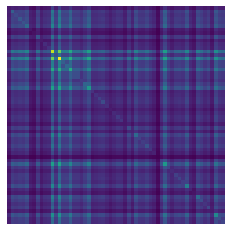

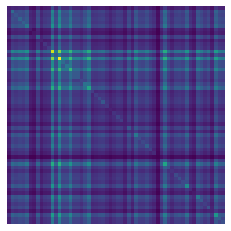

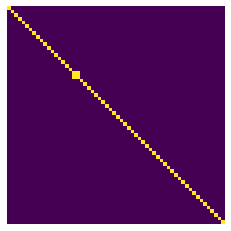

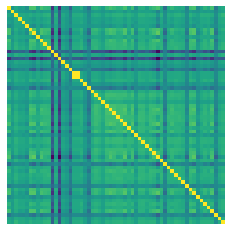

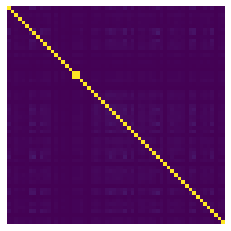

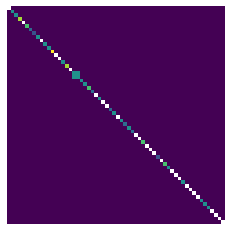

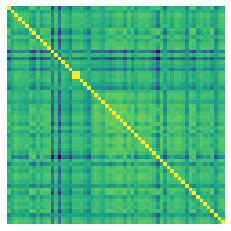

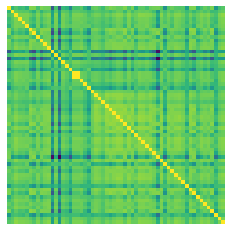

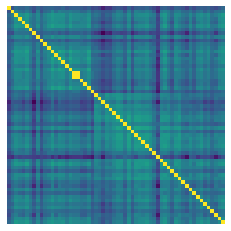

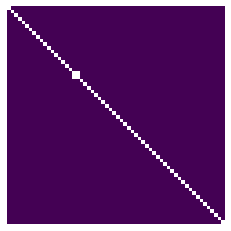

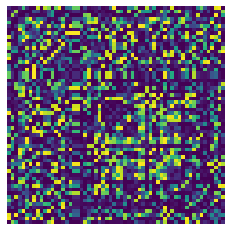

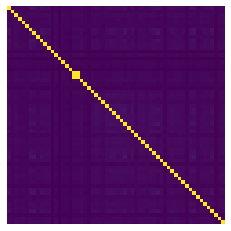

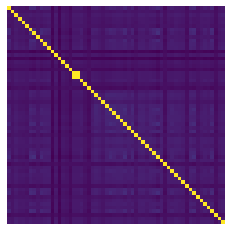

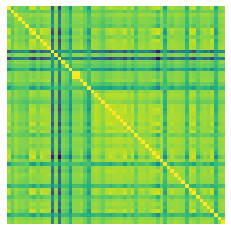

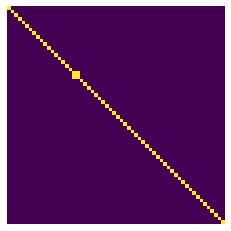

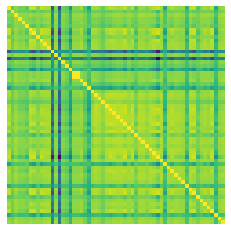

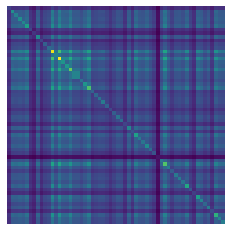

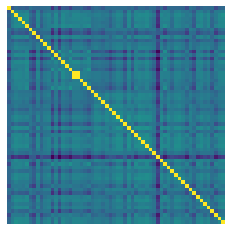

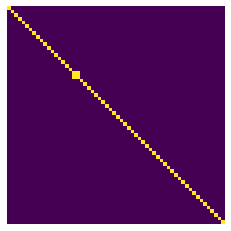

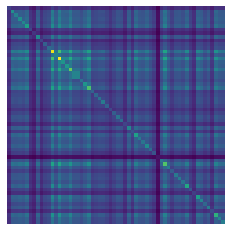

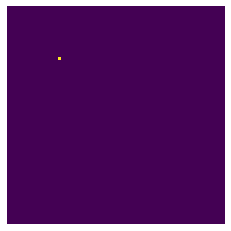

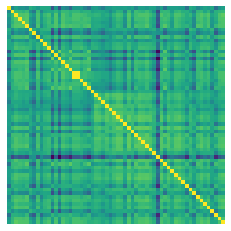

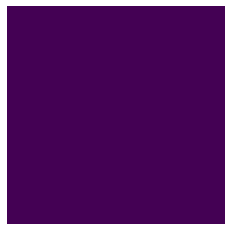

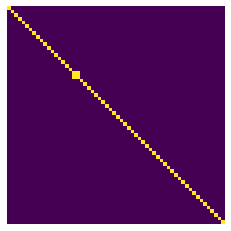

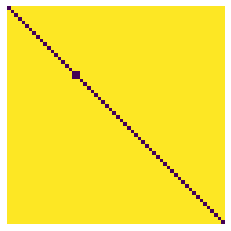

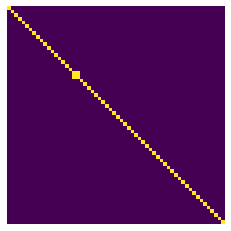

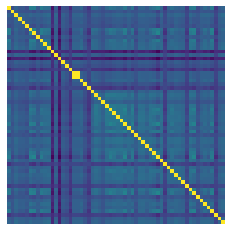

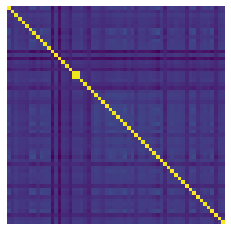

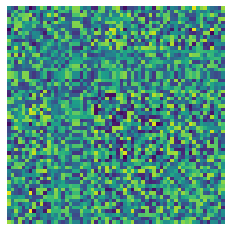

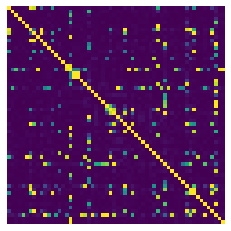

In [5]:
preview_kernels_on_dataset(X_mm_scaled, y, scale = False, embed_title = False)

We will not implement the following kernels.

### Bayesian Kernel (需要一个目标变量Y参与运算)

The Bayesian kernel could be given as:

$ k(x,y) = \prod_{l=1}^N \kappa_l (x_l,y_l) $

where

$ \kappa_l(a,b) = \sum_{c \in \{0;1\}} P(Y=c \mid X_l=a) ~ P(Y=c \mid X_l=b) $

However, it really depends on the problem being modeled. For more information, please see the work by Alashwal, Deris and Othman, in which they used a SVM with Bayesian kernels in the prediction of protein-protein interactions.


### B-Spline Kernel

The B-Spline kernel is defined on the interval [−1, 1]. It is given by the recursive formula:

$ k(x,y) = B_{2p+1}(x-y) $

$ \mbox{where~} p \in N \mbox{~with~} B_{i+1} := B_i \otimes B_0. $

In the work by Bart Hamers it is given by: $ k(x, y) = \prod_{p=1}^d B_{2n+1}(x_p - y_p) $

Alternatively, Bn can be computed using the explicit expression (Fomel, 2000):

$ B_n(x) = \frac{1}{n!} \sum_{k=0}^{n+1} \binom{n+1}{k} (-1)^k (x + \frac{n+1}{2} - k)^n_+ $

Where x+ is defined as the truncated power function:

$ x^d_+ = \begin{cases} x^d, & \mbox{if }x > 0 \\ 0, & \mbox{otherwise} \end{cases} $


# 核密度估计（kernel density estimation, KDE）- Application in non-parametric estimation

核密度估计（kernel density estimation）是在概率论中用来估计未知的密度函数，属于非参数检验方法之一，由Rosenblatt (1955)和Emanuel Parzen(1962)提出，又名Parzen窗（Parzen window）.核密度函数的原理比较简单，在我们知道某一事物的概率分布的情况下，如果某一个数在观察中出现了，我们可以认为这个数的概率密度很大，和这个数比较近的数的概率密度也会比较大，而那些离这个数远的数的概率密度会比较小

所谓核密度估计，就是采用平滑的峰值函数(“核”)来拟合观察到的数据点，从而对真实的概率分布曲线进行模拟。x1,x2,x3... 为独立同分布F的n个样本点，设其概率密度函数为f，核密度估计为以下：

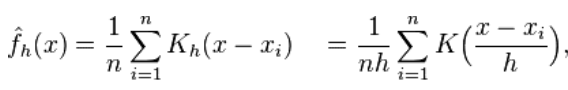

K(.)为核函数（非负、积分为1，符合概率密度性质）

h>0为一个平滑参数，称作带宽(bandwidth)或窗口(window)。

Kh(x) = 1/h K(x/h). 为缩放核函数(scaled Kernel)。 如果带宽不是固定的，其变化取决于估计的位置或样本点（逐点估计pointwise estimator），由此可以产产生一个非常强大的方法称为自适应或可变带宽核密度估计。

## Case Study 1: Two normal distributions 

(1000, 1)


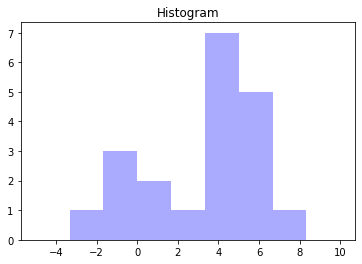

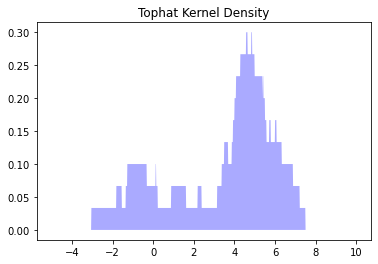

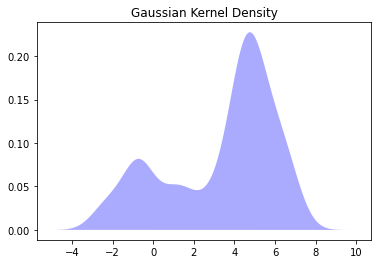

In [34]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
print(X_plot.shape)
bins = np.linspace(-5, 10, 10)


# histogram 1
plt.figure()
plt.hist(X[:, 0], bins=bins, fc='#AAAAFF')
plt.title("Histogram")
plt.show()

# tophat KDE
plt.figure()
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Tophat Kernel Density")
plt.show()

# Gaussian KDE
plt.figure()
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Gaussian Kernel Density")
plt.show()

Text(0.5, 1.0, 'Available Kernels')

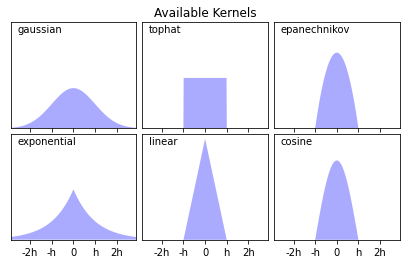

In [36]:
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

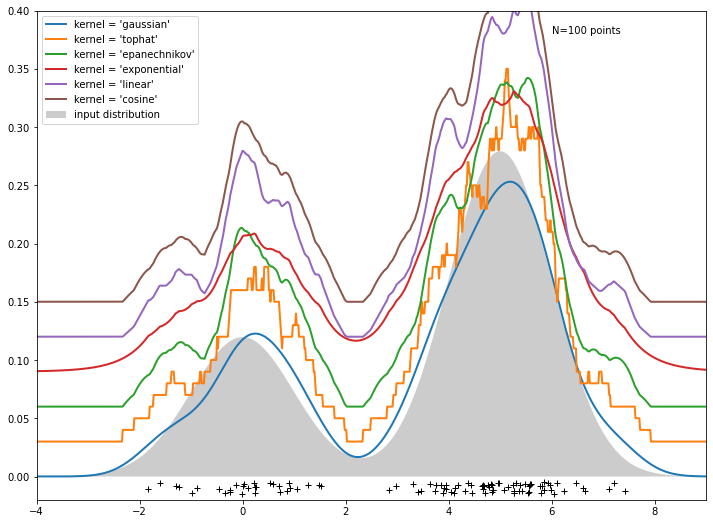

In [48]:
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots(figsize = (12,9))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov','exponential', 'linear', 'cosine']
lw = 2

for idx,kernel in enumerate(kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], idx*0.03 + np.exp(log_dens), lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel)) # color=color

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

gaussian kernel has the smoothest PDF curve.

## Case Study 2: digits

This example trains generative models. Similar to VAE.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

def KDE_on_digits(K = 1):
    
    # load the data
    digits = load_digits()

    # project the 64-dimensional data to a lower dimension
    pca = PCA(n_components=K, whiten=False)
    data = pca.fit_transform(digits.data)

    # use grid search cross-validation to optimize the bandwidth
    params = {'bandwidth': np.logspace(-1, 1, 20)}
    grid = GridSearchCV(KernelDensity(), params)
    grid.fit(data)

    print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

    # use the best estimator to compute the kernel density estimate
    kde = grid.best_estimator_

    # plot pdf
    if (K == 1):
        plt.figure(figsize = (20,4))
        X_plot = np.linspace(data.min(), data.max(), 1000)[:, None]
        log_dens = kde.score_samples(X_plot)
        plt.plot(np.exp(log_dens), color=color, lw=lw,
                linestyle='-', label="kernel = '{0}'".format(kernel))
        plt.title('PDF')
        plt.show()
    elif (K == 2):
        # Create grid and multivariate normal

        X, Y = np.meshgrid(np.linspace(data[:,0].min(), data[:,0].max(), 100),
                           np.linspace(data[:,0].min(), data[:,1].max(), 100))
        log_dens = kde.score_samples(np.array([X.flatten(), Y.flatten()]).T) # here, we need to input a (:,2) shape matrix
        Z = np.exp(log_dens).reshape(X.shape) # reshape to the 2D shape

        fig = plt.figure(figsize=(10, 8))
        ax = fig.gca(projection='3d')
        ax.plot_surface(X, Y, Z,cmap='Reds',linewidth=0, antialiased=True, zorder = 0.5)
        plt.title('PDF')
        plt.show()
        
        fig = plt.figure(figsize=(10, 8))
        plt.title('PDF')
        plt.contourf(X, Y, Z, 8, alpha=.75, cmap='gray_r')       
        plt.show()
    else:
        print('Dimension > 2. Skip PDF visualzation.')

    # sample 44 new points from the data
    new_data = kde.sample(44, random_state=0)
    new_data = pca.inverse_transform(new_data)

    # turn data into a 4x11 grid
    new_data = new_data.reshape((4, 11, -1))
    real_data = digits.data[:44].reshape((4, 11, -1))

    # plot real digits and resampled digits
    fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]), figsize = (9,11))
    for j in range(11):
        ax[4, j].set_visible(False)
        for i in range(4):
            im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
            im.set_clim(0, 16)
            im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                     cmap=plt.cm.binary, interpolation='nearest')
            im.set_clim(0, 16)

    ax[0, 5].set_title('Selection from the input data')
    ax[5, 5].set_title('"New" digits drawn from the kernel density model')

    plt.show()

------- Latent Vector Dimensionality =  1  -------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best bandwidth: 1.8329807108324356


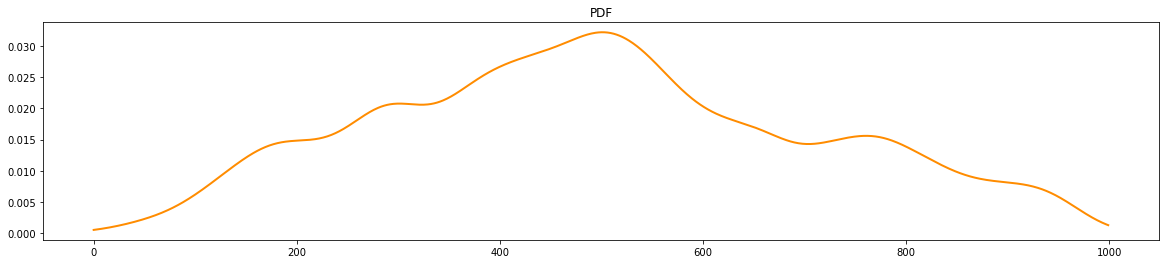

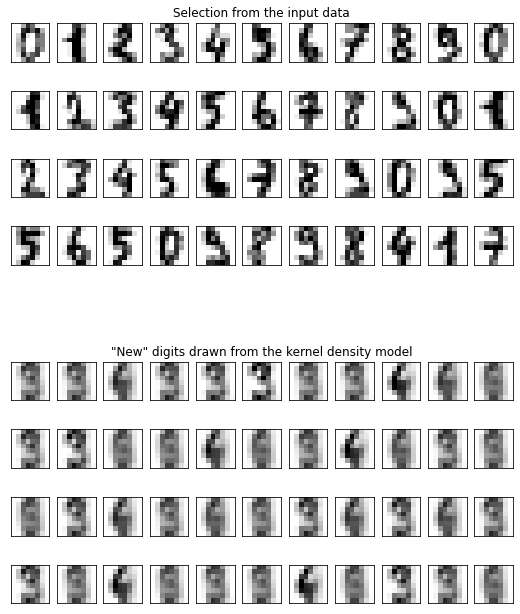

------- Latent Vector Dimensionality =  2  -------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best bandwidth: 2.3357214690901213


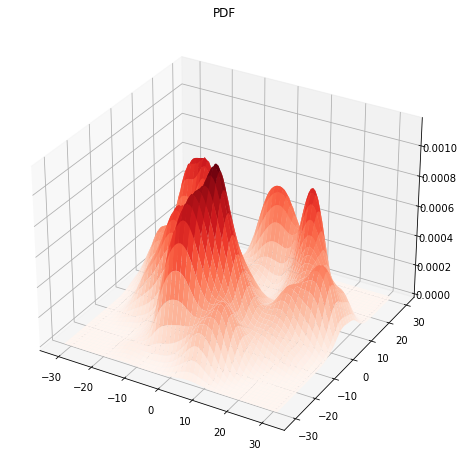

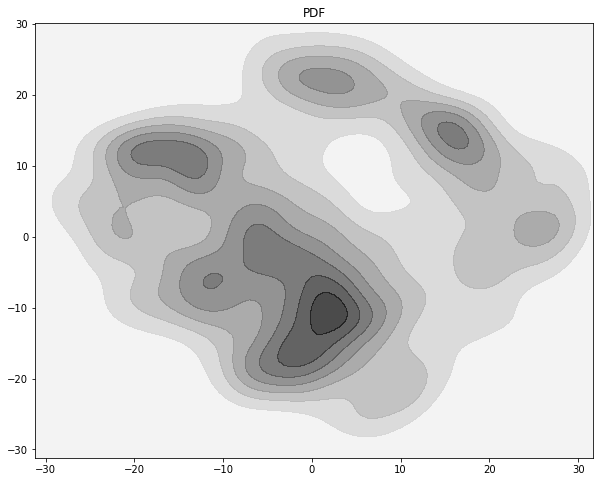

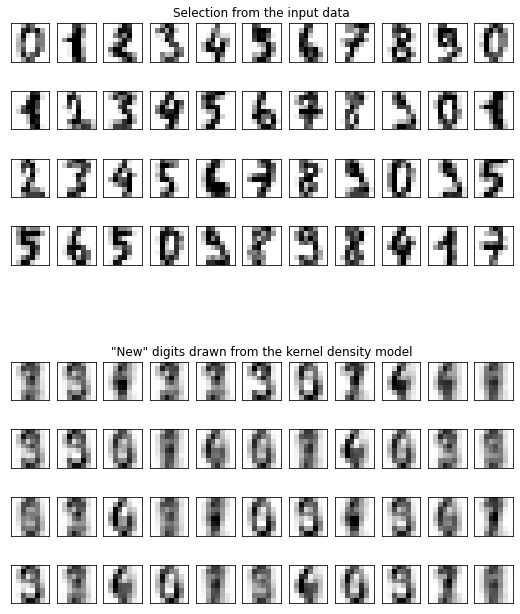

------- Latent Vector Dimensionality =  3  -------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best bandwidth: 2.9763514416313175
Dimension > 2. Skip PDF visualzation.


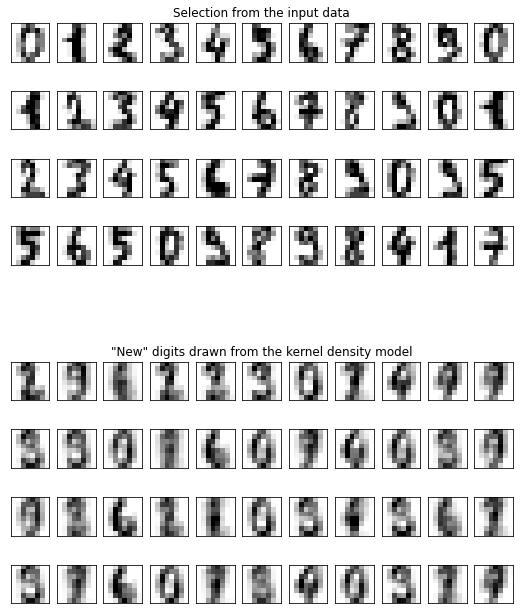

------- Latent Vector Dimensionality =  4  -------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best bandwidth: 2.9763514416313175
Dimension > 2. Skip PDF visualzation.


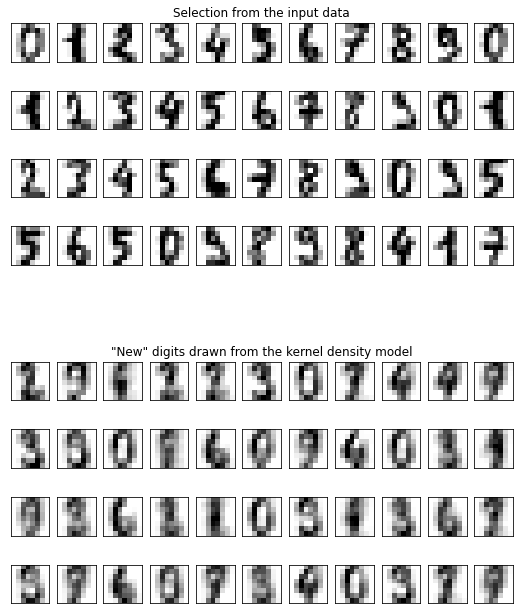

In [28]:
for K in range(1,5):
    print('------- Latent Vector Dimensionality = ', K, ' -------')
    KDE_on_digits(K)

## [Implementation](pykernels-master.zip)

https://github.com/gmum/pykernels



    Vector kernels for R^d
        Linear
        Polynomial
        RBF
        Cosine similarity
        Exponential
        Laplacian
        Rational quadratic
        Inverse multiquadratic
        Cauchy
        T-Student
        ANOVA
        Additive Chi^2
        Chi^2
        MinMax
        Min/Histogram intersection
        Generalized histogram intersection
        Spline
        Sorensen
        Tanimoto
        Wavelet
        Fourier
        Log (CPD)
        Power (CPD)

    Graph kernels

        Labeled
            Shortest paths

        Unlabeled
            Shortest paths
            3,4-Graphlets
            Random walk


## TODO: A theoretical comparison with VAE

## AE + KDE vs VAE 

## Comparison between different kernels in KDE